<a href="https://colab.research.google.com/github/Sikandarh11/Data-Science-Online-Notes/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [20]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [21]:
X_test.max()

255

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

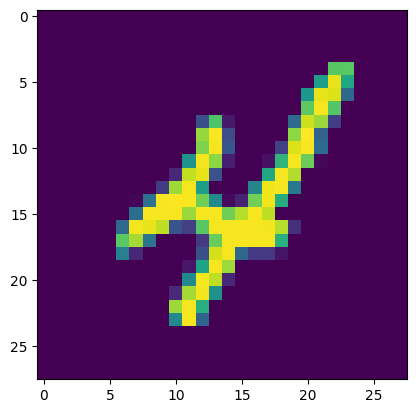

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[9])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2916 - accuracy: 0.9164 - val_loss: 0.1571 - val_accuracy: 0.9523
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1230 - accuracy: 0.9630 - val_loss: 0.1241 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0841 - accuracy: 0.9745 - val_loss: 0.1046 - val_accuracy: 0.9710
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0917 - val_accuracy: 0.9720
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 0.1093 - val_accuracy: 0.9707
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0919 - val_accuracy: 0.9749
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.1094 - val_accuracy

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9752

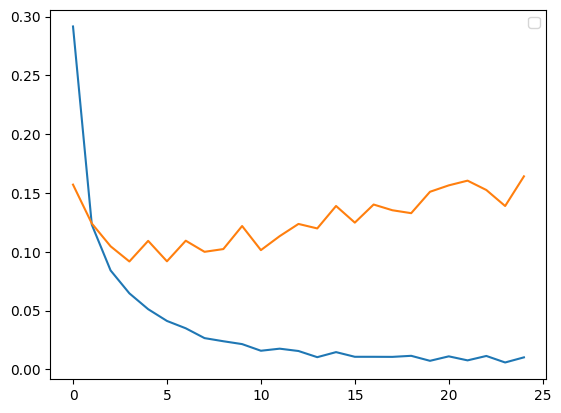

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

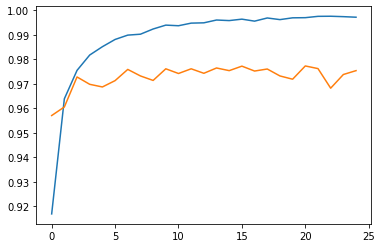

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

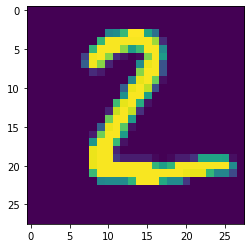

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])